In [1]:
# load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

full_dataset = pd.read_csv(r"D:\Programming languages\Matlab\MATLAB codes\total_network.csv")

dataset = full_dataset.iloc[:,1:]

coordinates = dataset[['Longitude','Latitude']] 
risks = dataset[['Node_type','Risk_Num','Top_Risk']]
X = dataset[['Longitude','Latitude','Node_type','Risk_Num','Top_Risk']] #for replacement

X = pd.get_dummies(X)
X.head()

,Longitude,Latitude,Risk_Num,Node_type_DC,Node_type_manufacturer,Node_type_retailer,Node_type_supplier,Node_type_transportation,Top_Risk_Financial risk,Top_Risk_Management risk,Top_Risk_market risk,Top_Risk_nature risk,Top_Risk_quality risk,Top_Risk_society risk
0,40.235042,-74.731277,10.000000,0,1,0,0,0,0,0,1,0,0,0
1,41.081757,-74.324553,8.662687,0,0,0,1,0,0,1,0,0,0,0
2,39.826599,-75.269951,9.366418,0,0,0,0,1,0,0,0,1,0,0
3,40.510113,-74.329241,8.836567,0,1,0,0,0,0,0,1,0,0,0
4,40.531916,-74.376306,8.426493,0,0,1,0,0,0,0,1,0,0,0


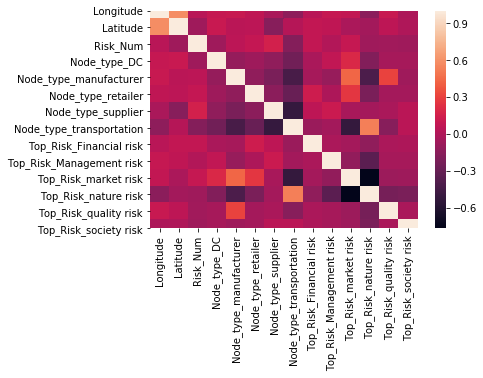

In [2]:
#correlationship analysis

import seaborn as sns

X.corr()
sns.heatmap(X.corr())

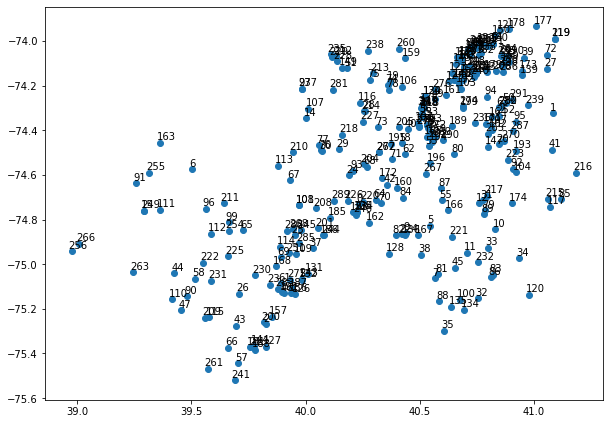

In [3]:
# Plot data

labels = range(294)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X.iloc[:,0],X.iloc[:,1])

for label, x, y in zip(labels, X.iloc[:, 0], X.iloc[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-3, 3), textcoords='offset points')
plt.show()

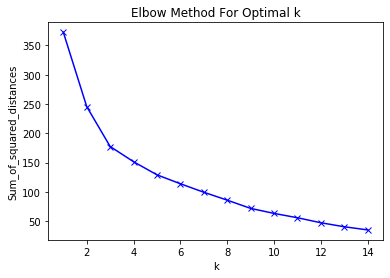

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

#Scaling the dataset
mms = MinMaxScaler()
mms.fit(X)
data_transformed = mms.transform(X)
X_std = pd.DataFrame(data_transformed)

# Elbow method to minize WSS(Within-cluster Sum of Square)
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_std)
    Sum_of_squared_distances.append(km.inertia_)
    
# Plotting the Elbow Curve by k(clusters number)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# As the plot shows the optimal k is 3.

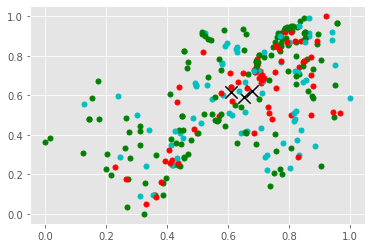

In [5]:
# K means clustering

from matplotlib import style
style.use('ggplot')
from sklearn.cluster import KMeans

clf=KMeans(n_clusters=3)
clf.fit(X_std)
dataset['cluster_Kmeans'] = clf.fit_predict(X_std)

centroids=clf.cluster_centers_
labels=clf.labels_

colors=['g.','r.','c.','b.','k.']

for i in range(len(X_std)): # index number i
    plt.plot(X_std.iloc[i][0], X_std.iloc[i][1], colors[labels[i]],markersize=10) #label is 0 or 1 only
plt.scatter(centroids[:,0],centroids[:,1],marker='x', s=150, linewidths=5,color = 'k')

plt.show()

In [6]:
X_std

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.570016,0.497417,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.953093,0.754016,0.866269,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.385224,0.157572,0.936642,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.694465,0.751059,0.883657,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.704330,0.721366,0.842649,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,0.427293,0.421669,0.048022,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
289,0.520839,0.506905,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
290,0.736385,0.677308,0.036754,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
291,0.872910,0.792254,0.017276,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


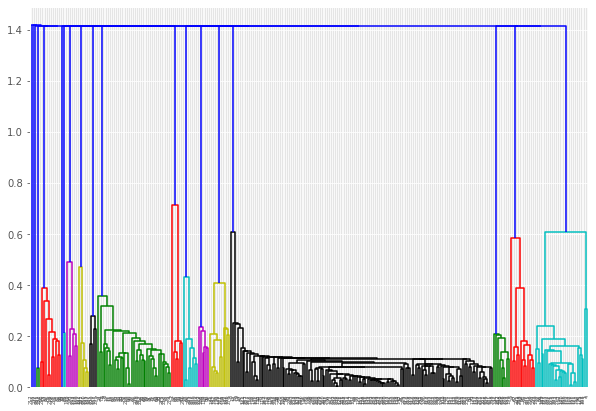

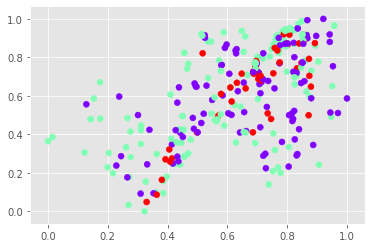

In [7]:
# Hierarchical Clustering

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

linked = linkage(X_std, 'single')
label_list = range(294)
plt.figure(figsize=(10, 7))

dendrogram(linked, orientation='top', labels=label_list, distance_sort='descending', show_leaf_counts=True)
plt.show()

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
dataset['cluster_HC'] = cluster.fit_predict(X_std)

plt.scatter(X_std.iloc[:, 0], X_std.iloc[:, 1], c=cluster.labels_, cmap='rainbow')

In [8]:
# save the file

path ='D:\\Programming languages\\Matlab\\MATLAB codes\\'
dataset.to_csv(path+'total_outputs_or.csv')

In [11]:
# Cluster the nodes on map

import folium
from folium.plugins import MarkerCluster

def color(group):
    if group==0:
        col='green'
    elif group==1:
        col='black'
    elif group==2:
        col='red'
    else: 
        col='blue'
    return col

cluster_map = folium.Map(location=[40.385,-74.549], zoom_start=8, control_scale=True)

for m in range(len(dataset)):
    folium.Marker(location=[dataset['Longitude'][m],dataset['Latitude'][m]],
                  popup = str(m+1),
                  icon=folium.Icon(color=color(dataset['cluster_HC'][m])),
                  clustered_marker=True).add_to(cluster_map)

cluster_map

In [12]:
# Draw Heatmap on Google map

import gmaps
import gmaps.datasets
import pandas as pd

gmaps.configure(api_key='') # Fill in with your API key
df = pd.read_csv(r"D:\Programming languages\Matlab\MATLAB codes\total_network.csv")

locations = df[['Longitude','Latitude']]
weights = df['Magnitude']
fig = gmaps.figure(map_type="SATELLITE")
fig.add_layer(gmaps.heatmap_layer(locations,weights=weights,point_radius=50))
fig

Figure(layout=FigureLayout(height='420px'))